In [1]:
from QC_Library.outliers import outlierRemoval, grossRangeFlag
import json
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr
import pandas as pd

In [3]:
file='/Users/oz/downloads/nh_all.json'
with open(file) as f:
    data = json.load(f)

In [4]:
meta=data['deployment_meta']
params = meta['params']
times = data['time_vals']

In [5]:
paramsArray = np.array(params)
sstindex = np.where(paramsArray == 'sst')[0][0]  #makes a temporary array from params dictionary
sssindex = np.where(paramsArray == 'sal')[0][0]
o2index = np.where(paramsArray == 'sc_o2_umolkg')[0][0]
phindex = np.where(paramsArray == 'ph')[0][0]
print(phindex)

chlindex = np.where(paramsArray == 'chl')[0][0]
print(chlindex)



16
139


In [6]:
obs_vals = data['obs_vals']
sst = obs_vals[str(sstindex)]
sals = obs_vals[str(sssindex)]
o2s = obs_vals[str(o2index)]
phs = obs_vals[str(phindex)]
chls = obs_vals[str(chlindex)]


In [7]:
# this maps missing values to NaNs
sst = np.array(sst)
sst[np.where(sst==-999)] = np.nan
sst[np.where(sst==-99)] = np.nan
sals = np.array(sals)
sals[np.where(sals==-999)] = np.nan
sals[np.where(sals==-99)] = np.nan
o2s = np.array(o2s)
o2s[np.where(o2s==-999)] = np.nan
o2s[np.where(o2s==-99)] = np.nan
np.nanmin(o2s)

phs = np.array(phs)
phs[np.where(phs==-999)] = np.nan
phs[np.where(phs==-99)] = np.nan
np.nanmin(phs)

chls = np.array(chls)
chls[np.where(chls==-999)] = np.nan
chls[np.where(chls==-99)] = np.nan
np.nanmin(chls)


-0.68

In [8]:
# taking time in epoch time and converting to datetime type [s] indicates seconds
realtimes = np.array(times, dtype='datetime64[s]')

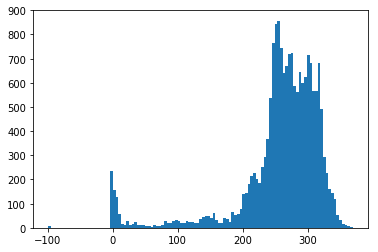

In [9]:
plt.hist(o2s[~np.isnan(o2s)], bins='auto')
plt.show()

In [10]:
allo2flags = grossRangeFlag(realtimes, o2s, 17, 400)
newdata = np.copy(o2s)
newdata[np.where(allo2flags != 2)] = np.nan

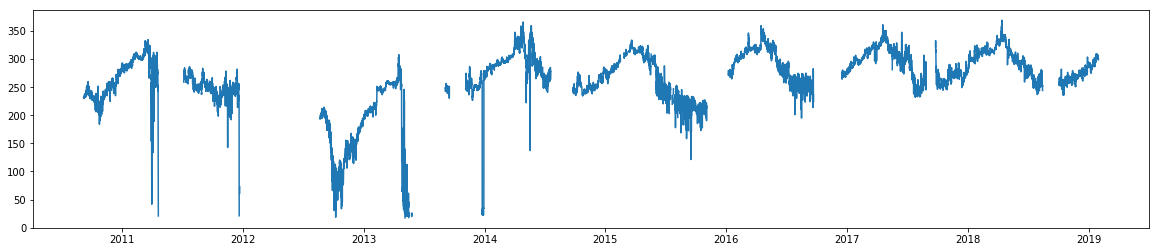

In [11]:

plt.figure(figsize=(20,4))
plt.plot(realtimes, newdata)

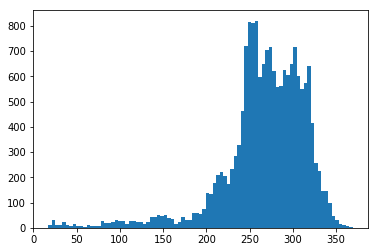

In [12]:
tempo2s = np.copy(o2s)
tempo2s[np.where(allo2flags!=2)] = np.nan
plt.hist(tempo2s[~np.isnan(tempo2s)], bins='auto')
plt.show()

In [13]:

theRetDict = outlierRemoval(realtimes, o2s, windowInDays=1,
                                          maxIterations=50, flags=allo2flags, verbosity=1)
finalo2flags = theRetDict['flags']

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/QC_Library/outliers.py:34: RuntimeWarning: Mean of empty slice
  means[indx] = np.nanmean(data[window])
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/QC_Library/outliers.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  numDevs[indx] = (data[indx] - means[indx])/np.sqrt(variances[indx])


0   601  points flagged


/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/QC_Library/outliers.py:60: RuntimeWarning: invalid value encountered in greater
  localflags[np.where(np.abs(numDevs) > numStdDevs)] = 4


1   1409  points flagged
2   1618  points flagged
3   1703  points flagged
4   1750  points flagged
5   1763  points flagged
6   1767  points flagged


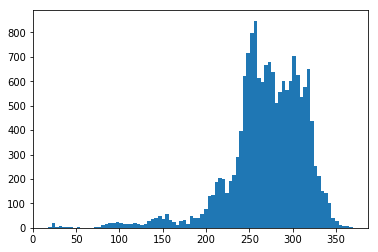

In [16]:
tempo2s = np.copy(o2s)
tempo2s[np.where(finalo2flags!=2)] = np.nan
plt.hist(tempo2s[~np.isnan(tempo2s)], bins='auto')
plt.show()

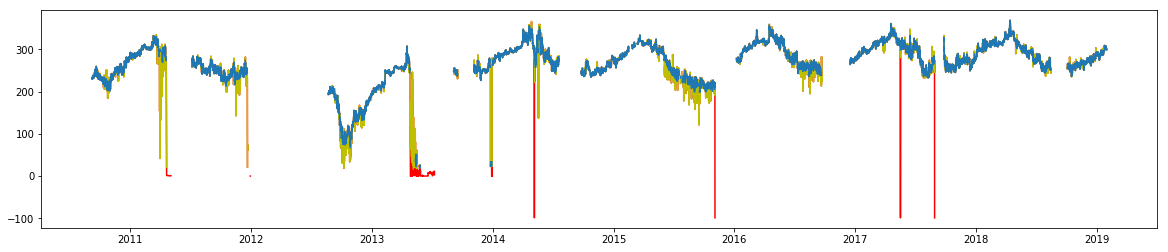

In [17]:
# o2s is all the original data--take out all the flagged data
finaldata = np.copy(o2s)
finaldata[np.where(finalo2flags != 2)] = np.nan
plt.figure(figsize=(20,4))
plt.plot(realtimes, o2s, c='r')
plt.plot(realtimes, newdata, c='y')
plt.plot(realtimes, finaldata)

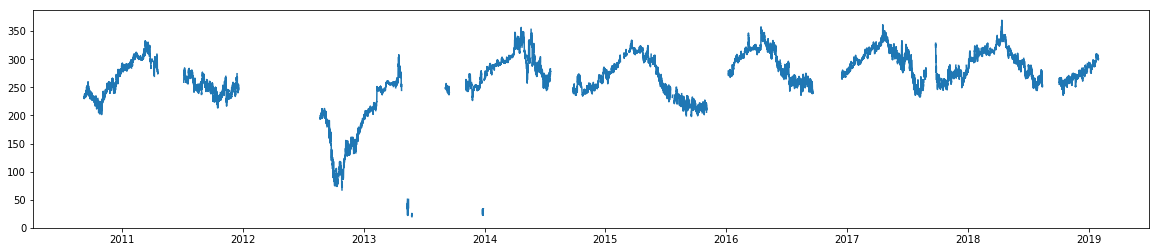

In [18]:
finaldata = np.copy(o2s)
finaldata[np.where(finalo2flags != 2)] = np.nan
plt.figure(figsize=(20,4))
plt.plot(realtimes, finaldata)

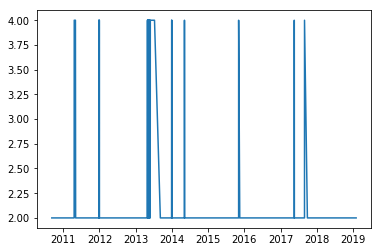

In [19]:
plt.plot(realtimes, allo2flags)

In [20]:
salflags = grossRangeFlag(realtimes, sals, 17, 40)
newdata = np.copy(sals)
newdata[np.where(salflags != 2)] = np.nan

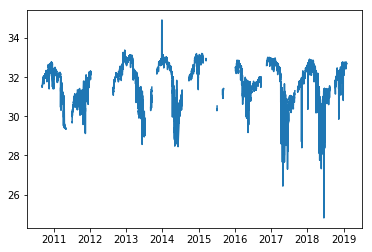

In [21]:
plt.plot(realtimes, newdata)

In [22]:
salRetDict = outlierRemoval(realtimes, sals, windowInDays=1,
                                          maxIterations=50, flags=salflags, verbosity=1)
finalsalflags = salRetDict['flags']

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


0   172  points flagged


/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater


1   188  points flagged
2   192  points flagged


(20, 40)

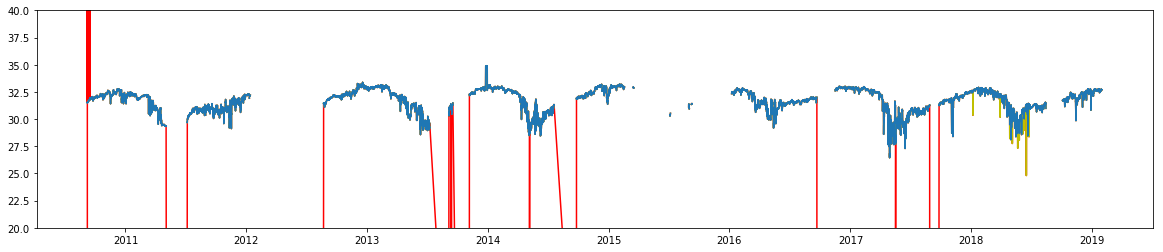

In [95]:
finaldata = np.copy(sals)
finaldata[np.where(finalsalflags != 2)] = np.nan
plt.figure(figsize=(20,4))
plt.plot(realtimes, sals, c='r')
plt.plot(realtimes, newdata, c='y')
plt.plot(realtimes, finaldata)
plt.ylim([20,40])


In [25]:
means = np.copy(salRetDict['means'])


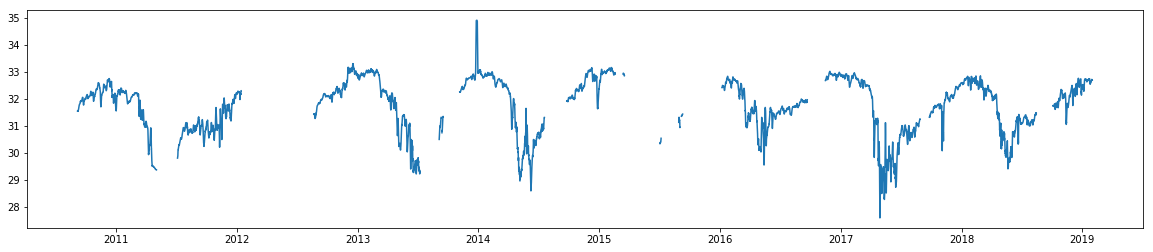

In [26]:

means[np.where(finalsalflags != 2)] = np.nan
plt.figure(figsize=(20,4))
# plt.plot(realtimes, sals, c='r')
# plt.plot(realtimes, newdata, c='y')
plt.plot(realtimes, means)

In [27]:
tIndices = np.where((realtimes > np.datetime64('2018-01-01')) &  (realtimes < np.datetime64('2018-08-14')))

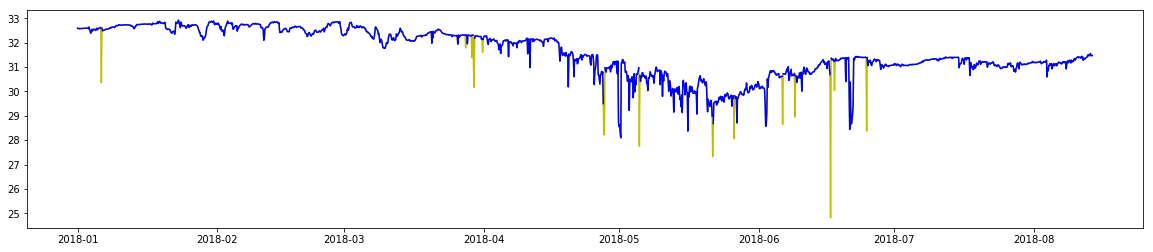

In [28]:
plt.figure(figsize=(20,4))
plt.plot(realtimes[tIndices[0]], newdata[tIndices[0]], c='y')
plt.plot(realtimes[tIndices[0]], finaldata[tIndices[0]], c='b')

In [29]:
salDict2 = outlierRemoval(realtimes, sals, windowInDays=2,
                                          maxIterations=50, flags=salflags, verbosity=1)
finalsalflags2 = salDict2['flags']

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice


0   172  points flagged


/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater


1   188  points flagged


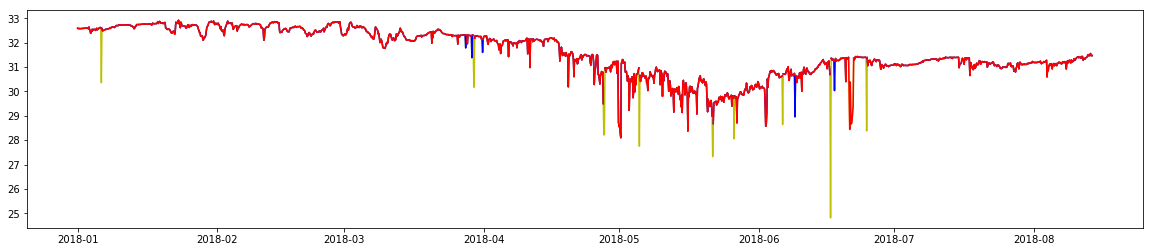

In [30]:
finaldata_2 = np.copy(sals)
finaldata_2[np.where(finalsalflags2 != 2)] = np.nan
plt.figure(figsize=(20,4))
plt.plot(realtimes[tIndices[0]], newdata[tIndices[0]], c='y')
plt.plot(realtimes[tIndices[0]], finaldata_2[tIndices[0]], c='b')
plt.plot(realtimes[tIndices[0]], finaldata[tIndices[0]], c='r')

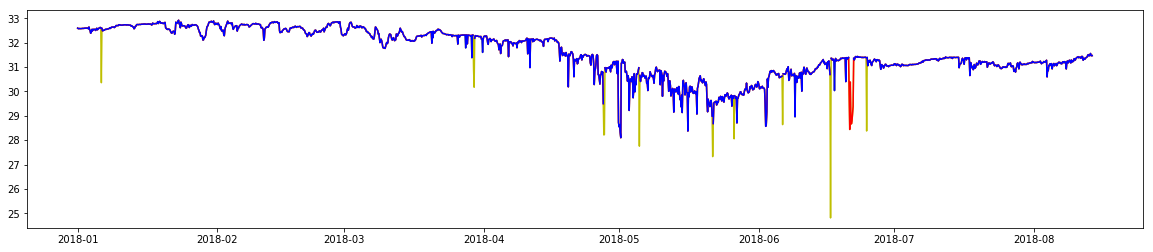

In [31]:
plt.figure(figsize=(20,4))
plt.plot(realtimes[tIndices[0]], newdata[tIndices[0]], c='y')
plt.plot(realtimes[tIndices[0]], finaldata[tIndices[0]], c='r')
plt.plot(realtimes[tIndices[0]], finaldata_2[tIndices[0]], c='b')

In [34]:
salDict4 = outlierRemoval(realtimes, sals, windowInDays=0.5,
                                          maxIterations=50, flags=salflags, verbosity=1)
finalsalflags4 = salDict4['flags']

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


0   218  points flagged


/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


1   242  points flagged
2   243  points flagged


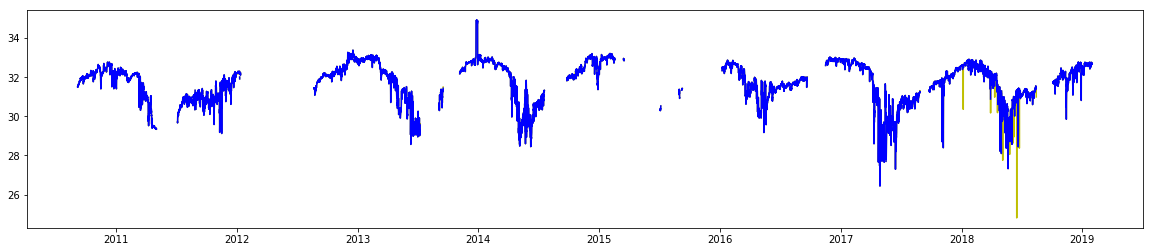

In [35]:
finaldata_4 = np.copy(sals)
finaldata_4[np.where(finalsalflags4 != 2)] = np.nan
plt.figure(figsize=(20,4))
plt.plot(realtimes, newdata, c='y')
plt.plot(realtimes, finaldata_4, c='b')
# plt.plot(realtimes[tIndices[0]], finaldata[tIndices[0]], c='r')

In [38]:
np.where(salflags == 9)[0].size

0

In [39]:
np.where(finalsalflags4 == 9)[0].size

49

In [40]:
tIndices2 = np.where((realtimes > np.datetime64('2013-12-01')) &
                     (realtimes < np.datetime64('2014-01-31')))

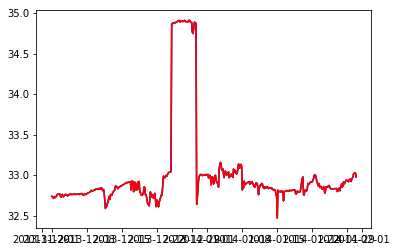

In [41]:

plt.plot(realtimes[tIndices2[0]], finaldata_2[tIndices2[0]], c='b')
plt.plot(realtimes[tIndices2[0]], newdata[tIndices2[0]], c='y')
plt.plot(realtimes[tIndices2[0]], finaldata[tIndices2[0]], c='r')

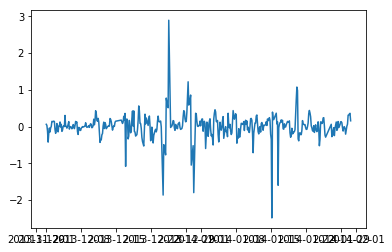

In [43]:
plt.plot(realtimes[tIndices2[0]], salRetDict['numdevs'][tIndices2[0]])


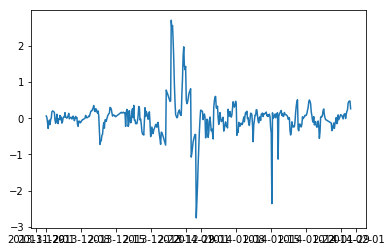

In [44]:
plt.plot(realtimes[tIndices2[0]], salDict2['numdevs'][tIndices2[0]])


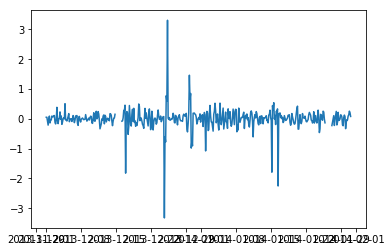

In [45]:
plt.plot(realtimes[tIndices2[0]], salDict4['numdevs'][tIndices2[0]])


In [48]:
rise_time = np.datetime64('2013-12-25 00:17')
day_before_inds = np.where((realtimes > (rise_time - np.timedelta64(1, 'D'))) & 
                           (realtimes < (rise_time)))
day_after_inds = np.where((realtimes > (rise_time)) & 
                           (realtimes < (rise_time + np.timedelta64(1, 'D'))))


In [52]:
mean_before = np.nanmean(sals[day_before_inds])
variance_before = np.nanvar(sals[day_before_inds])
mean_after = np.nanmean(sals[day_after_inds])
variance_after = np.nanvar(sals[day_after_inds])


In [53]:
print(mean_before)
print(mean_after)

33.02814285714286
34.87814285714286


In [54]:
print(variance_before)
print(variance_after)

0.00020012244897960884
3.1836734693879097e-05


In [56]:
np.abs(mean_before - mean_after) / np.sqrt((variance_before+variance_after)/2)

171.78329960615142

In [62]:
def baseline_shift_detector(timeArray, data, flags=None, minWindowN=4, windowInDays=1):
    if flags is None:
        localflags = np.zeros_like(data, dtype=np.int) + 2
    else:
        localflags = np.copy(flags)

    if data.ndim != 1 or timeArray.ndim != 1 or localflags.ndim != 1:
        raise ValueError("Inputs must be 1D")

    deltaTime = pd.Timedelta(windowInDays, 'D').to_timedelta64()

    windowsN_before = np.zeros_like(data, dtype=np.int)
    windowsN_after = np.zeros_like(data, dtype=np.int)
    baselineDevs = np.zeros_like(data)

    for indx,time in enumerate(timeArray):
        if (localflags[indx] == 4):
            baselineDevs[indx] = np.nan
            continue

        window_before = np.where((timeArray > time-deltaTime) &  (timeArray < time) &
                                 (timeArray != time) & (flags != 4))[0]
        window_after = np.where((timeArray > time) &  (timeArray < time+deltaTime) &
                                (timeArray != time) & (flags != 4))[0]

        windowsN_before[indx] = window_before.size
        windowsN_after[indx] = window_after.size
        if (windowsN_before[indx] < minWindowN) or (windowsN_after[indx] < minWindowN) :
            localflags[indx] = 9
            baselineDevs[indx] = np.nan
            continue
        iQRange_before = iqr(data[window_before], nan_policy='omit')
        variance_before = (3/4) * iQRange_before
        iQRange_after = iqr(data[window_after], nan_policy='omit')
        variance_after = (3/4) * iQRange_after
        mean_before = np.nanmean(data[window_before])
        mean_after = np.nanmean(data[window_after])
        baselineDevs[indx] = (mean_before - mean_after) / np.sqrt((variance_before+variance_after)/2)
        #return dict
        retdict = {'baselineDevs':baselineDevs, 'flags': localflags}
    return retdict


In [66]:
baseline_dict = baseline_shift_detector(realtimes, sals, flags=salflags)

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in double_scalars


(-10, 10)

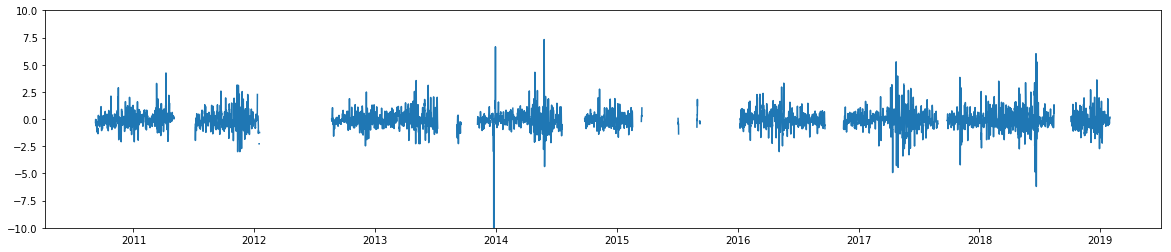

In [75]:
plt.figure(figsize=(20,4))
plt.plot(realtimes, baseline_dict['baselineDevs'])
plt.ylim([-10,10])


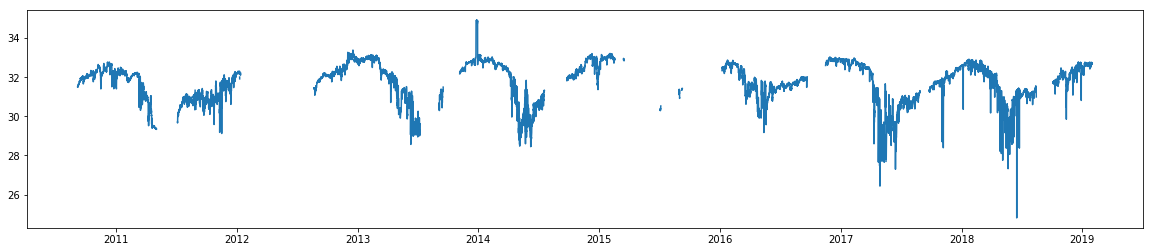

In [71]:
plt.figure(figsize=(20,4))
plt.plot(realtimes, newdata)


(-10, 10)

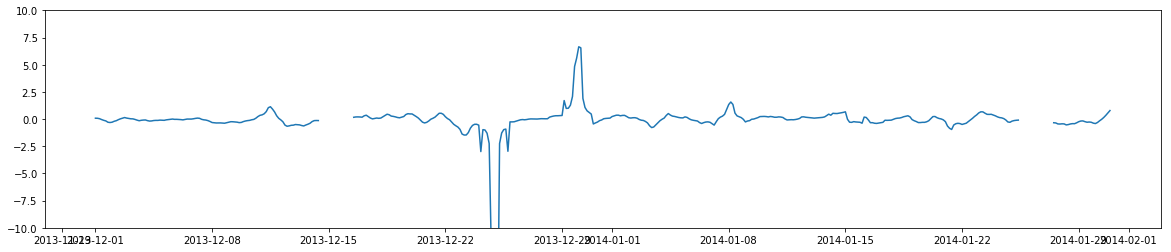

In [76]:
plt.figure(figsize=(20,4))
plt.plot(realtimes[tIndices2[0]], baseline_dict['baselineDevs'][tIndices2[0]])
plt.ylim([-10,10])


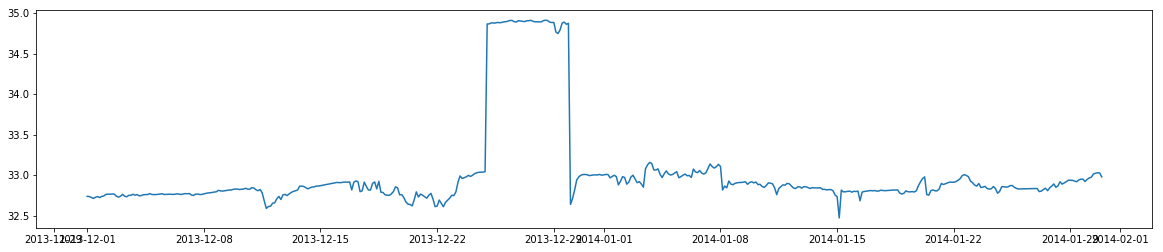

In [77]:
plt.figure(figsize=(20,4))
plt.plot(realtimes[tIndices2[0]], newdata[tIndices2[0]])


In [78]:
tIndices3 = np.where((realtimes > np.datetime64('2014-05-20')) &
                     (realtimes < np.datetime64('2014-05-31')))

(-5, 5)

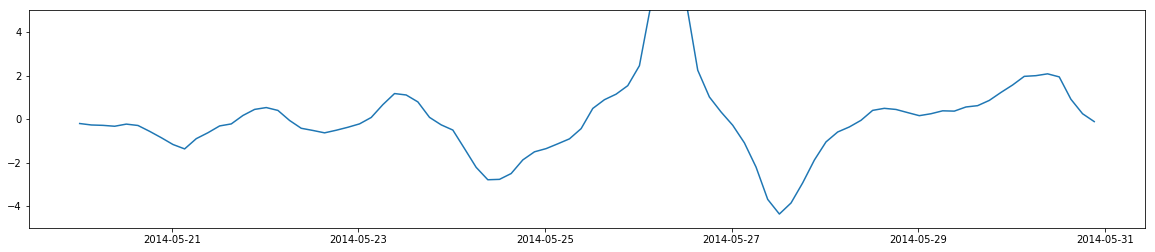

In [81]:
plt.figure(figsize=(20,4))
plt.plot(realtimes[tIndices3[0]], baseline_dict['baselineDevs'][tIndices3[0]])
plt.ylim([-5,5])

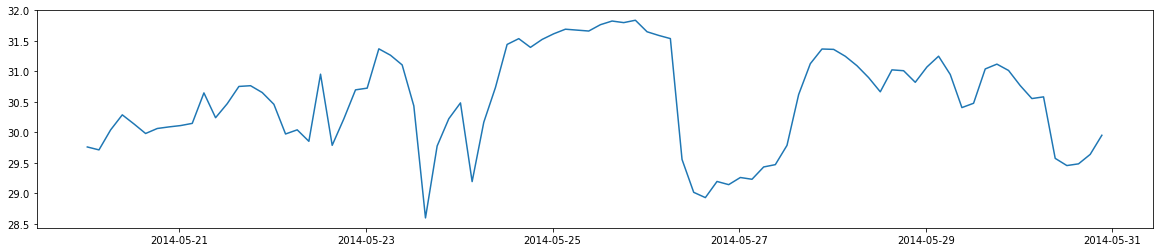

In [80]:
plt.figure(figsize=(20,4))
plt.plot(realtimes[tIndices3[0]], newdata[tIndices3[0]])


In [82]:
tIndices4 = np.where((realtimes > np.datetime64('2018-05-01')) &
                     (realtimes < np.datetime64('2018-06-30')))

(-5, 5)

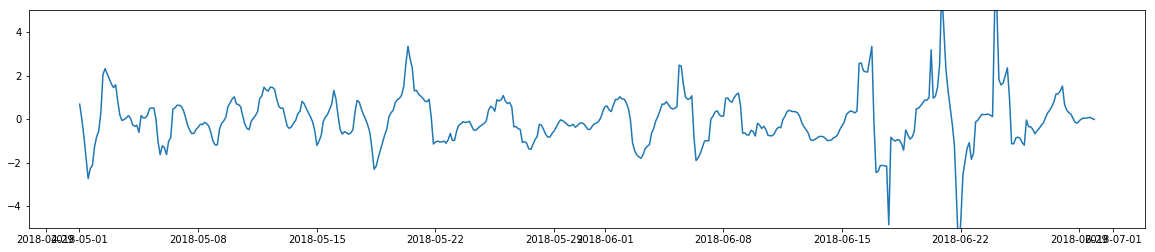

In [92]:
plt.figure(figsize=(20,4))
plt.plot(realtimes[tIndices4[0]], baseline_dict['baselineDevs'][tIndices4[0]])
plt.ylim([-5,5])

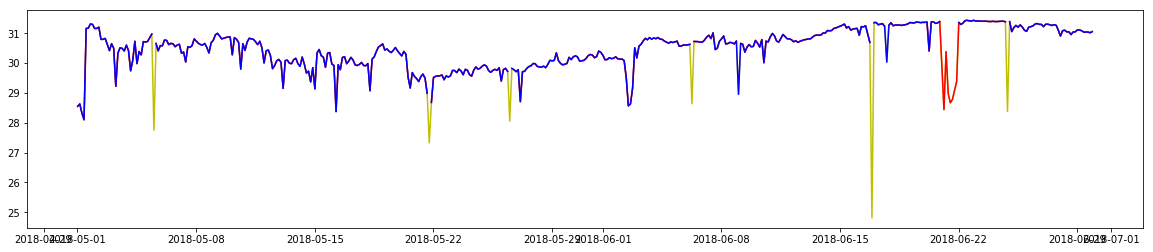

In [90]:
plt.figure(figsize=(20,4))
plt.plot(realtimes[tIndices4[0]], newdata[tIndices4[0]], c='y')
plt.plot(realtimes[tIndices4[0]], finaldata[tIndices4[0]], c='r')
plt.plot(realtimes[tIndices4[0]], finaldata_2[tIndices4[0]], c='b')

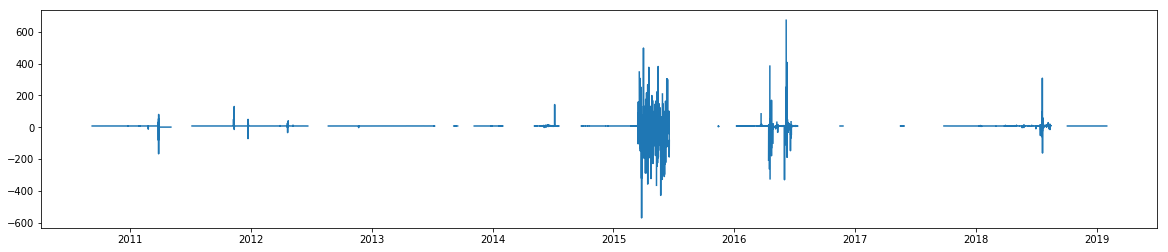

In [107]:

plt.figure(figsize=(20,4))
plt.plot(realtimes, phs)

In [14]:
allphflags = grossRangeFlag(realtimes, phs, 7.5, 8.5)
newdataph = np.copy(phs)
newdataph[np.where(allphflags != 2)] = np.nan

In [15]:
theRetDictph = outlierRemoval(realtimes, phs, windowInDays=1,
                                          maxIterations=50, flags=allphflags, verbosity=1)
finalphflags = theRetDictph['flags']

0   1500  points flagged
1   1517  points flagged
2   1519  points flagged
3   1522  points flagged


(0, 14)

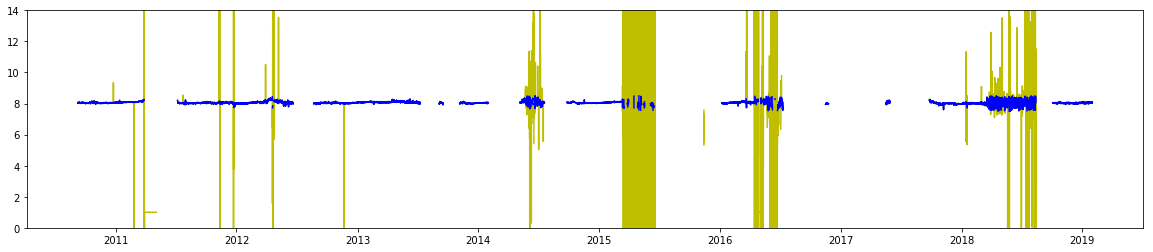

In [16]:
plt.figure(figsize=(20,4))
plt.plot(realtimes, phs, c='y')
plt.plot(realtimes, newdataph, c='b')
plt.ylim([0, 14])

In [17]:
newdataph_aftertest = np.copy(phs)
newdataph_aftertest[np.where(finalphflags != 2)] = np.nan

(7, 9)

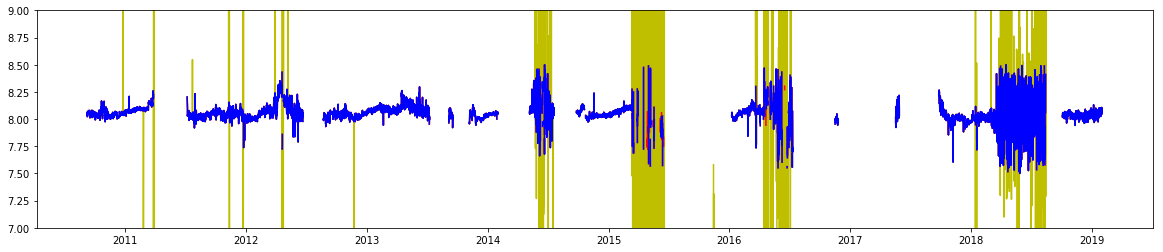

In [18]:
plt.figure(figsize=(20,4))
plt.plot(realtimes, phs, c='y')
plt.plot(realtimes, newdataph, c='r')
plt.plot(realtimes, newdataph_aftertest, c='b')
plt.ylim([7, 9])

In [19]:
tIndices5 = np.where((realtimes > np.datetime64('2011-09-01')) &
                     (realtimes < np.datetime64('2012-04-30')))[0]

(7, 9)

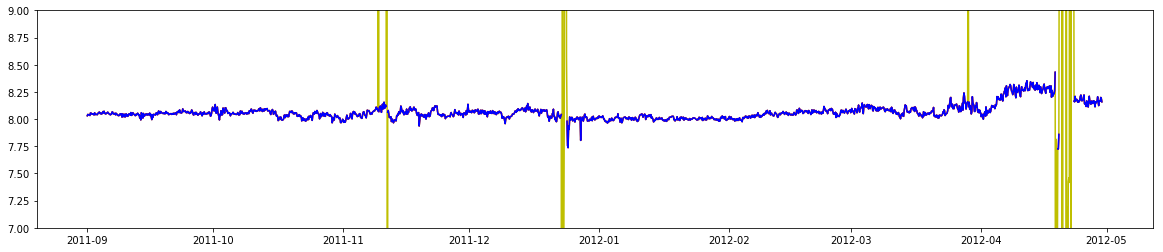

In [20]:
plt.figure(figsize=(20,4))
plt.plot(realtimes[tIndices5], phs[tIndices5], c='y')
plt.plot(realtimes[tIndices5], newdataph[tIndices5], c='r')
plt.plot(realtimes[tIndices5], newdataph_aftertest[tIndices5], c='b')
plt.ylim([7, 9])

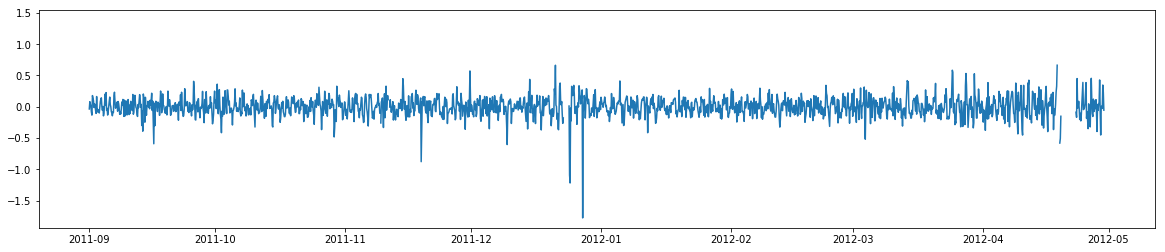

In [21]:
plt.figure(figsize=(20,4))
plt.plot(realtimes[tIndices5], theRetDictph['numdevs'][tIndices5])
